In [2]:
%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import pytorch_lightning as pl
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import torchvision.datasets as TorchvisionDataset
import numpy as np
import torchvision.utils as TorchVisionUtils

# Set random seed for reproducibility
seed = 69

print("Random Seed: ", seed)
random.seed(seed)
torch.manual_seed(seed)

Random Seed:  69


In [18]:
# Inheritance. pass the parent class as an argument
class WaifuDataloader(pl.LightningDataModule):
#   __init__ is the reserved method name for constructors.
    def __init__(self, folderpath='/Users/dareosk/code/dareosK/anime-faces-generator/inputs', 
                 batch_size = 128, 
                 image_size = 64, 
                 transforms = None):
        """
        This constructor does pretty much the same things a Rails constructor would
        
        :parameter folderpath: folder containing waifu images
        :parameter image_size: image size (eg 64*64) to centercrop + resize to
        :parameter transforms: transormations to apply to tha images
        """
#       initialize the parent class LightningDataModule
        super().__init__(self)
#       class variables, a bit like local variables in the model in rails
        self.folderpath = folderpath
        self.batch_size = batch_size
        self.image_size = image_size
#       None is like Null
#                         Compose allows you to do a list of transformations
        self.transforms = transforms if transforms is not None else \
                          T.Compose([T.Resize(image_size),
                          T.CenterCrop(image_size),
                          T.ToTensor(),
#                         DCGAN paper mentions the results are better with this normalization
                          T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    
        self.dataset = TorchvisionDataset.ImageFolder(root = folderpath, transform = self.transforms)

#       sets another class variable!
        self.dataloader = None
    
#   I can also call this in the __init__ if I want my class to be instatiated with a DataLoader. 
#   Otherwise, I can set the Class up and call WaifuDataloader.setup()
    def setup(self):
        self.dataloader = DataLoader(self.dataset, batch_size = self.batch_size, shuffle=True, num_workers = 4)

#       Not too important. These methods are here for demonstration purposes
    def get_batch(self):
        if self.dataloader is None:
            self.setup()
        # The syntax is weird but this is how you get a batch from dataloader
        batch = next(iter(self.dataloader))
        return batch

    def preview_batch(self, normalize=True):
        """
        Preview a batch of waifus
        """
        batch = self.get_batch()
        plt.figure(figsize=(8, 8))
        plt.axis("off")
        plt.title("Training Images")
        plt.imshow(np.transpose(TorchVisionUtils.make_grid(batch[0].to('cpu')[:64],
                                                           padding=2,
                                                           normalize=normalize).cpu(), (1, 2, 0)))

    

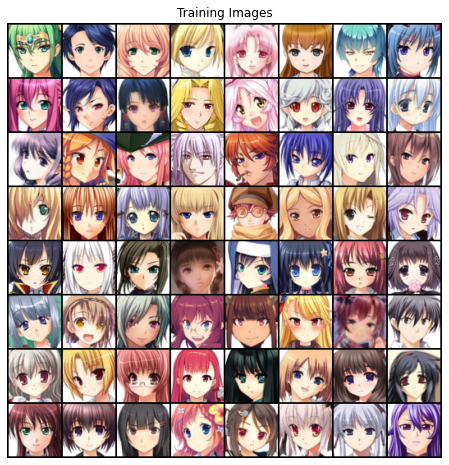

In [20]:
potato = WaifuDataloader()
potato.setup()
potato.preview_batch()